# Introduction:

This project focuses on applying various data cleaning, exploratory data analysis (EDA), and data preparation techniques to a dataset containing detailed information on mortgage loan applications from the Federal Reserve Bank of Boston. The primary goal is to develop a model that can predict whether a given mortgage loan application is likely to be approved or denied, assisting regulators in identifying potential instances of discrimination in lending practices.

***

* **Variables:** The dataset comprises 2,381 observations and 13 attributes.
    * Independent variables and their descriptions (refer to the dataset documentation for full details:
        * **ATOTAL:** Applicant's total assets.
        * **AVER:** Applicant's average monthly payments.
        * **CLRER:** Applicant's average monthly payments on revolving credit.
        * **DFRAC:** Debt-to-income ratio.
        * **HPI:** Housing price index for the applicant's area.
        * **LOAN:** Loan amount requested.
        * **MI:** Mortgage insurance indicator.
        * **MORTD:** Mortgage debt.
        * **NETW:** Applicant's net worth.
        * **OCC:** Applicant's occupation.
        * **RACE:** Applicant's race.
        * **SCHOOL:** Applicant's education level.

    * Dependent Variable (Response Variable):
        * **DENY:** Indicates whether or not a mortgage application was denied (1 = Denied, 0 = Approved).

***

**Procedures:**
Here are the main procedures for this analysis:
<br>

* **Part 1**: Load Data
    * Get data from GitHub
    * Load the dataset into a Pandas DataFrame.
    <br>
    <br>
* **Part 2**: Perform Exploratory Data Analysis
    * Understanding the nature of each variable  & initial inspections.
    * Perform a thorough EDA on all data attributes to understand their nature, distributions, and relationships.
    * Conduct initial inspections for missing values, invalid data values, and correct data types.
    * Create appropriate exploratory graphics (e.g., bar plots, box plots, histograms, line plots) to visualize data characteristics.
    * Identify and document all potential data integrity and usability issues, assessing which attributes may require transformation.
    <br>
    <br>
* **Part 3**: Data Preparation
    * Address the data integrity and usability issues identified during EDA.
    * Describe and justify all data transformation and preparation steps, such as:
        * Deletion of observations (if needed).
        * Imputation methods for missing data values.
        * Feature Engineering: Creation of new variables
        * Application of mathematical transforms (e.g., Box-Cox, logarithms) or binning.
    <br>
    <br>
* **Part 4**: Prepped Data Review
    * Re-run EDA analysis on variables that were adjusted during the Data Preparation phase.
    * Compare and contrast the results with the pre-preparation EDA to evaluate the impact of adjustments.
    * Clearly describe how each data preparation step has improved the dataset for machine learning algorithm suitability.
    <br>
    <br>
* **Part 5**: Regression Modeling
    * Explain and present your regression modeling work, including your feature selection work + interpretation of the coefficients your models are generating.
    * Do they make sense intuitively? If so, why? If not, why not?
    * Comment on the magnitude and direction of the coefficients + whether they are similar from model to model.
    <br>
    <br>
* **Part 6**: Model Selection
    * Explain your model selection criteria. Identify your preferred model. Compare / contrast its performance with that of your other models.
    * Discuss why you’ve selected that specific model as your preferred model. Apply your preferred model to the testing subset and discuss your results.
    * Did your preferred model perform as well as expected?
    <br>
    <br>
* **Part 7**: Conclusions
    * Summarize the key findings and insights from the entire data cleaning, preparation, and exploratory analysis process.
    * Discuss the overall readiness and improved quality of the dataset for building robust machine learning models.

## Part 1: Load Data
1. Get data from GitHub
2. Load the dataset into a Pandas DataFrame.

### 1. Get data from GitHub

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [129]:
# URL to HDMA_Boston_Housing_Data.csv file on GitHub
url = "https://raw.githubusercontent.com/CheliMex/CS381_DataAnalytics/refs/heads/main/Quiz4/HDMA_Boston_Housing_Data.csv"

### 2. Load the dataset into a Pandas DataFrame

In [130]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv(url)

In [131]:
# Display first 5 row
print("--- Initial Data Load ---\n")
df.head()

--- Initial Data Load ---



,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [132]:
# Renaming the 1st column
df = df.rename(columns={'Unnamed: 0': 'Index'})
df

,Index,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,5,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,2378,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


## Part 2: Perform Exploratory Data Analysis (EDA)
1. Initial inspections
2. Understanding the nature of each variable
3. Perform a thorough EDA on all data attributes to understand their nature, distributions, and relationships.
4. Missing value inspection, invalid data values, and correct data types.
5. Create exploratory graphics (e.g., bar plots, box plots, histograms, line plots) to visualize data characteristics.
6. Identify and document all potential data integrity and usability issues, assessing which attributes may require transformation.

### 1. Initial inspections

In [133]:
print("--- DataFrame Info ---\n")
df.info()

--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2380 non-null   object 
 7   dmi          2381 non-null   object 
 8   self         2380 non-null   object 
 9   single       2381 non-null   object 
 10  uria         2381 non-null   float64
 11  comdominiom  2381 non-null   int64  
 12  black        2381 non-null   object 
 13  deny         2381 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 260.6+ KB


In [134]:
# Data Type Conversions (for columns that are 'yes'/'no' strings)
# Convert 'pbcr' (public record of bad credit indicator) column: 'yes' -> 1, 'no' -> 0
if 'pbcr' in df.columns and df['pbcr'].dtype == 'object':
    print("Converting 'pbcr' column from 'yes'/'no' (object) to 1/0 (numeric)...")
    df['pbcr'] = df['pbcr'].map({'yes': 1, 'no': 0})
    df['pbcr'] = df['pbcr'].fillna(0).astype(int)
    print("Conversion of 'pbcr' complete.")
elif 'pbcr' in df.columns:
    print(f"'pbcr' column is already numeric (dtype: {df['pbcr'].dtype}). No conversion needed.")
else:
    print("Warning: 'pbcr' column not found. If it's expected, check column names.")

Converting 'pbcr' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'pbcr' complete.


In [135]:
# Convert 'dmi' (mortgage insurance indicator) column: 'yes' -> 1, 'no' -> 0
# The original dataset documentation refers to this as 'condo', but your CSV uses 'dmi'.
if 'dmi' in df.columns and df['dmi'].dtype == 'object':
    print("Converting 'dmi' column from 'yes'/'no' (object) to 1/0 (numeric)...")
    df['dmi'] = df['dmi'].map({'yes': 1, 'no': 0})
    # Fill any NaNs introduced by map with 0 and convert to int
    df['dmi'] = df['dmi'].fillna(0).astype(int)
    print("Conversion of 'dmi' complete.")
elif 'dmi' in df.columns:
    print(f"'dmi' column is already numeric (dtype: {df['dmi'].dtype}). No conversion needed.")
else:
    print("Warning: 'dmi' column not found. If it's expected, check column names.")

Converting 'dmi' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'dmi' complete.


In [136]:
# Convert 'self' (self-employed indicator) column: 'yes' -> 1, 'no' -> 0
if 'self' in df.columns and df['self'].dtype == 'object':
    print("Converting 'self' column from 'yes'/'no' (object) to 1/0 (numeric)...")
    df['self'] = df['self'].map({'yes': 1, 'no': 0})
    df['self'] = df['self'].fillna(0).astype(int)
    print("Conversion of 'self' complete.")
elif 'self' in df.columns:
    print(f"'self' column is already numeric (dtype: {df['self'].dtype}). No conversion needed.")
else:
    print("Warning: 'self' column not found. If it's expected, check column names.")

Converting 'self' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'self' complete.


In [137]:
# Convert 'single' (single applicant indicator) column: 'yes' -> 1, 'no' -> 0
if 'single' in df.columns and df['single'].dtype == 'object':
    print("Converting 'single' column from 'yes'/'no' (object) to 1/0 (numeric)...")
    df['single'] = df['single'].map({'yes': 1, 'no': 0})
    df['single'] = df['single'].fillna(0).astype(int)
    print("Conversion of 'single' complete.")
elif 'single' in df.columns:
    print(f"'single' column is already numeric (dtype: {df['single'].dtype}). No conversion needed.")
else:
    print("Warning: 'single' column not found. If it's expected, check column names.")

Converting 'single' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'single' complete.


In [138]:
# Convert 'black' (black applicant indicator) column: 'yes' -> 1, 'no' -> 0
if 'black' in df.columns and df['black'].dtype == 'object':
    print("Converting 'black' column from 'yes'/'no' (object) to 1/0 (numeric)...")
    df['black'] = df['black'].map({'yes': 1, 'no': 0})
    # Fill any NaNs introduced by map with 0 and convert to int
    df['black'] = df['black'].fillna(0).astype(int)
    print("Conversion of 'black' complete.")
elif 'black' in df.columns:
    print(f"'black' column is already numeric (dtype: {df['black'].dtype}). No conversion needed.")
else:
    print("Warning: 'black' column not found. If it's expected, check column names.")

Converting 'black' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'black' complete.


In [139]:
# Convert 'deny' column: 'yes' -> 1, 'no' -> 0
if 'deny' in df.columns and df['deny'].dtype == 'object':
    print("Converting 'deny' column from 'yes'/'no' (object) to 1/0 (numeric)...")
    df['deny'] = df['deny'].map({'yes': 1, 'no': 0})
    # Fill any NaNs introduced by map (if there were values other than 'yes'/'no') with a default, e.g., 0
    df['deny'] = df['deny'].fillna(0).astype(int)
    print("Conversion of 'deny' complete.")
elif 'deny' in df.columns:
    print(f"\n'deny' column is already numeric (dtype: {df['deny'].dtype}). No conversion needed.")

Converting 'deny' column from 'yes'/'no' (object) to 1/0 (numeric)...
Conversion of 'deny' complete.


### 2. Understanding each variable & initial inspections

In [152]:
print("--- Rechecking DataFrame Info ---\n")
df.info()
print("\n--- Dtype objects have been converted to int64 ---")

--- Rechecking DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2381 non-null   int64  
 7   dmi          2381 non-null   int64  
 8   self         2381 non-null   int64  
 9   single       2381 non-null   int64  
 10  uria         2381 non-null   float64
 11  comdominiom  2381 non-null   int64  
 12  black        2381 non-null   int64  
 13  deny         2381 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 260.6 KB

--- Dtype objects have been converted to int64 ---


In [141]:
print("--- Unique Values and Value Counts for Categorical/Object Attributes ---\n")

# Identify object columns (potential categorical)
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    print(f"\n--- Column: {col} ---")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")
    # Check if there are values that might represent missing data
    if ' ' in df[col].unique() or '' in df[col].unique():
        print(f"Warning: Column '{col}' contains empty strings.")
    if 'unknown' in df[col].str.lower().unique():
        print(f"Warning: Column '{col}' contains 'unknown' values.")

--- Unique Values and Value Counts for Categorical/Object Attributes ---



### 3. Perform EDA on all data attributes

In [142]:
print("--- Descriptive Statistics for Numerical Columns ---\n")
df.describe()

--- Descriptive Statistics for Numerical Columns ---



,Index,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,0.073499,0.020160,0.116338,0.393532,3.774496,0.288114,0.142377,0.119698
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,0.261008,0.140576,0.320697,0.488636,2.026636,0.452980,0.349510,0.324676
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


### 4. Missing value inspection

In [157]:
print("--- Count of Missing Values per Column ---\n")
df.isnull().sum()

--- Count of Missing Values per Column ---



Index          0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [159]:
print("--- Unique Values and Value Counts for Categorical/Object Columns (after initial conversions) ---")
# Identify object columns (potential categorical) - this list will be smaller after 'yes'/'no' conversions
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\n--- Column: {col} ---")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")
    # Check if there are values that might represent missing or erroneous data
    if ' ' in df[col].unique() or '' in df[col].unique():
        print(f"Warning: Column '{col}' contains empty strings.")
    if 'unknown' in df[col].str.lower().unique():
        print(f"Warning: Column '{col}' contains 'unknown' values.")
object_cols

--- Unique Values and Value Counts for Categorical/Object Columns (after initial conversions) ---


Index([], dtype='object')

### 5. Exploratory graphics

In [161]:
# Re-generate numerical and categorical columns lists after conversions
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# 'deny' is now explicitly numeric, so it can stay in numerical_cols for the heatmap,
# but we remove it from other general numerical plots if it's solely the target.
if 'deny' in numerical_cols:
    plot_numerical_cols = [col for col in numerical_cols if col != 'deny']
else:
    plot_numerical_cols = numerical_cols

categorical_cols = df.select_dtypes(include='object').columns.tolist()

--- Visualizing Distributions of Numerical Variables (Histograms) ---



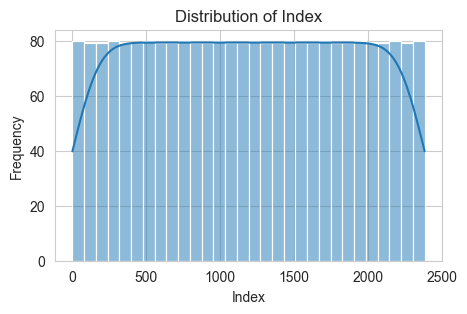

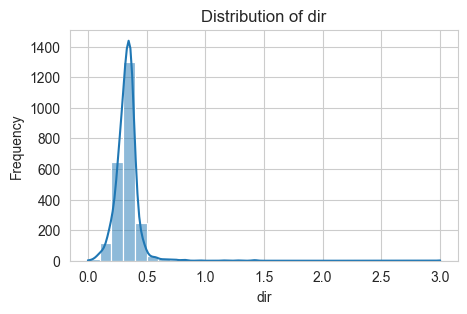

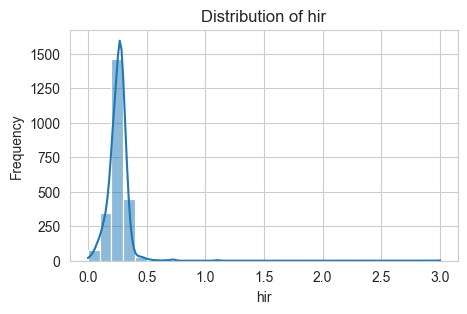

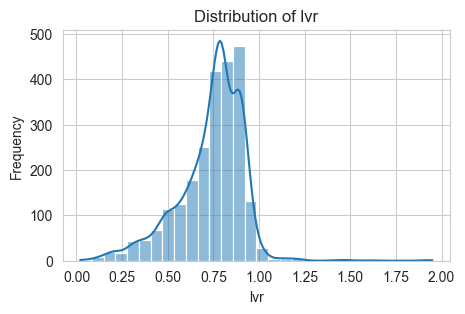

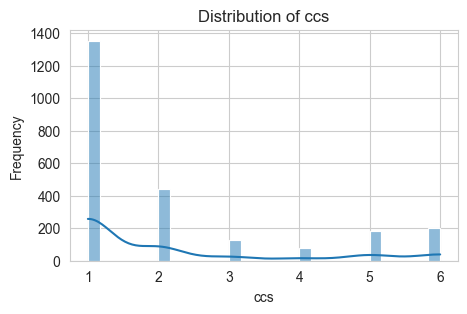

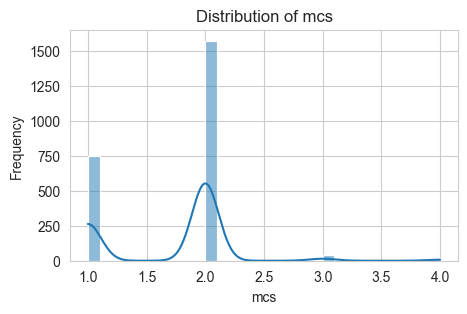

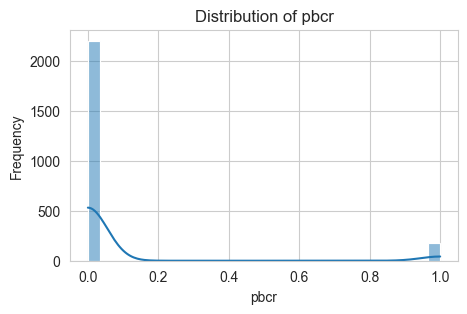

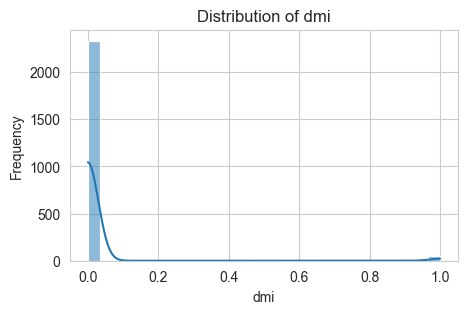

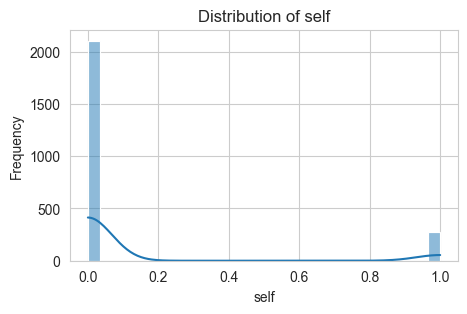

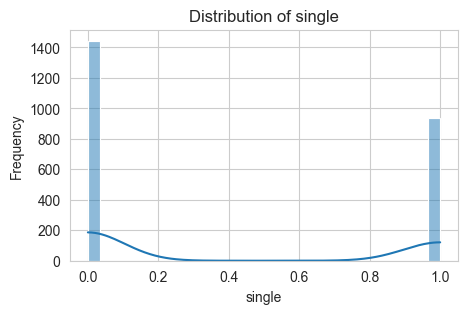

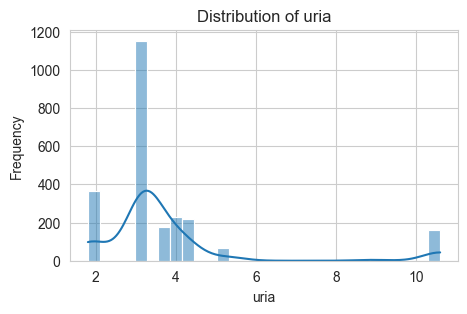

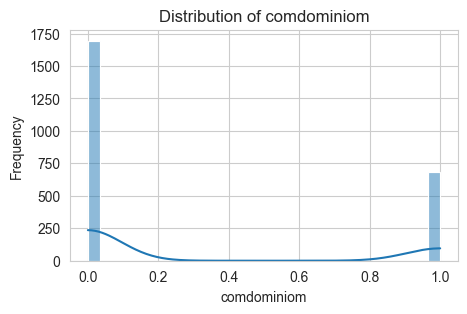

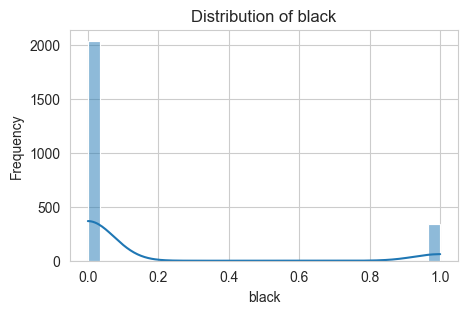

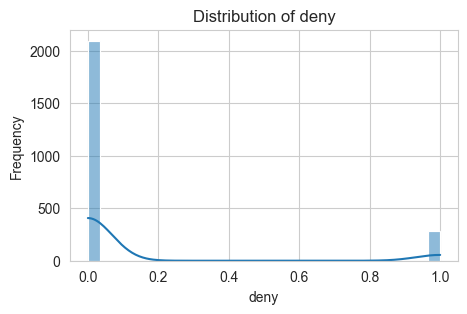

In [162]:
# Set a style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (5, 3)

# Histograms
print("--- Visualizing Distributions of Numerical Variables (Histograms) ---\n")
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [145]:
print("--- Visualizing Distributions of Categorical Variables (Bar Plots) ---\n")
for col in categorical_cols:
    plt.figure()
    sns.countplot(y=df[col].dropna(), order = df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

--- Visualizing Distributions of Categorical Variables (Bar Plots) ---



### 6. Identify all potential data

--- Analyzing Relationship with Target Variable (DENY) ---



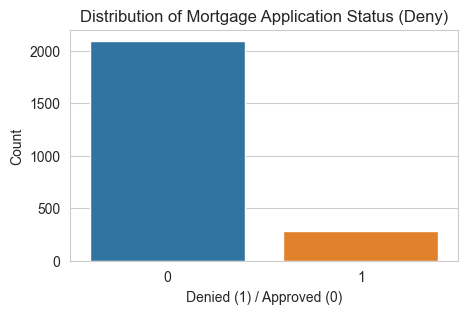

deny
0    0.880302
1    0.119698
Name: proportion, dtype: float64

Observation: The dataset shows an imbalance in the target variable, with more approvals than denials.


In [146]:
print("--- Analyzing Relationship with Target Variable (DENY) ---\n")

# Distribution of the target variable 'DENY'
plt.figure()
sns.countplot(x='deny', data=df, hue='deny', legend=False)
plt.title('Distribution of Mortgage Application Status (Deny)')
plt.xlabel('Denied (1) / Approved (0)')
plt.ylabel('Count')
plt.show()
print(df['deny'].value_counts(normalize=True))
print("\nObservation: The dataset shows an imbalance in the target variable, with more approvals than denials.")

--- Numerical Variables vs. DENY (Box Plots) ---



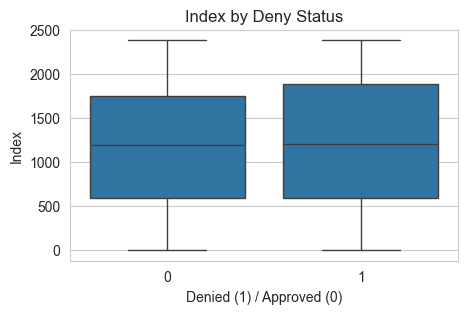

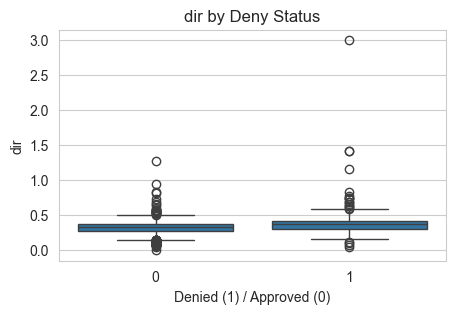

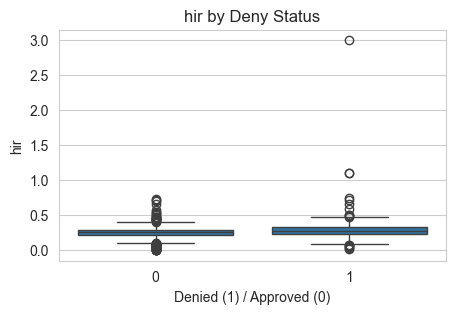

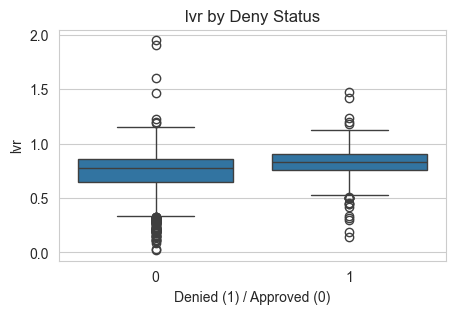

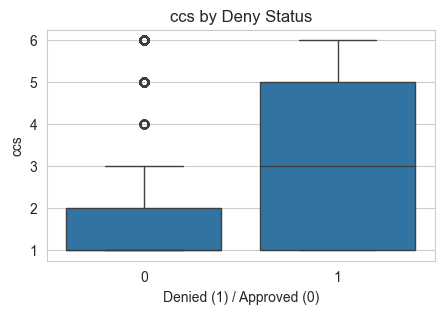

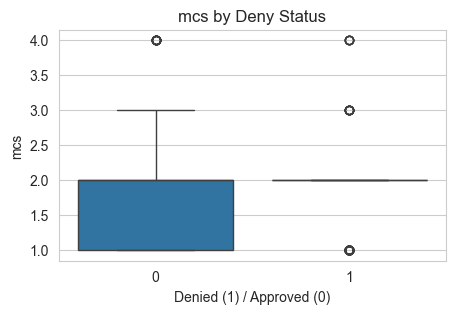

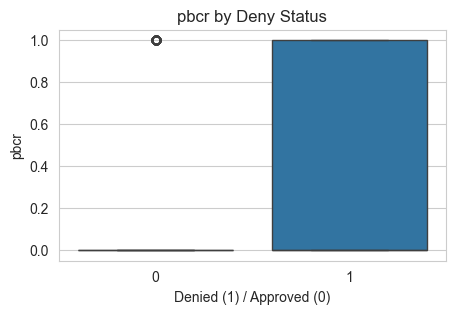

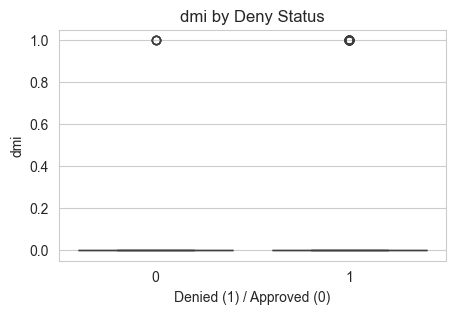

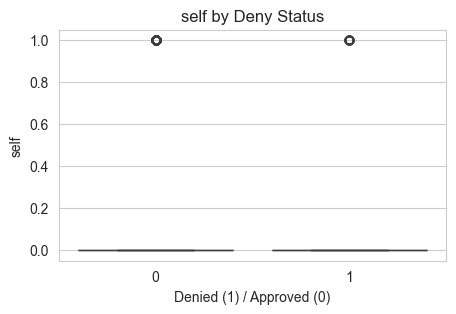

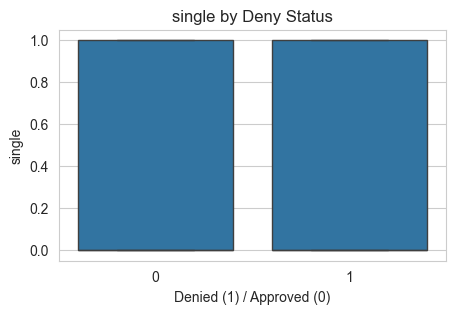

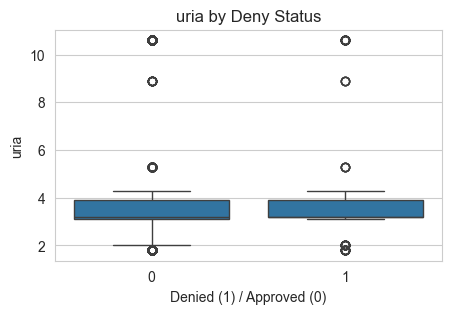

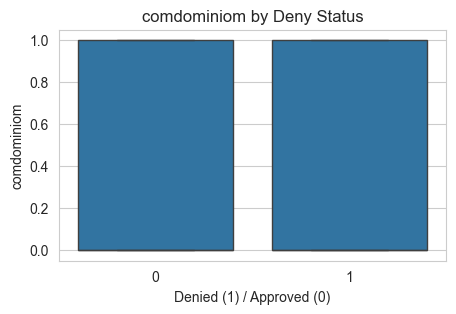

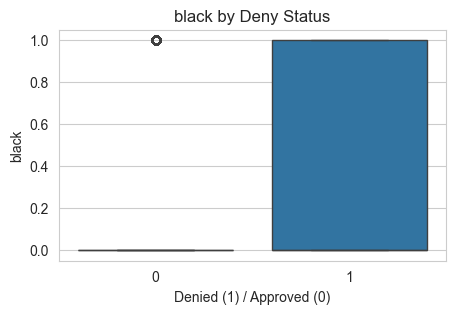

In [147]:
# Numerical variables vs. DENY
print("--- Numerical Variables vs. DENY (Box Plots) ---\n")
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x='deny', y=col, data=df)
    plt.title(f'{col} by Deny Status')
    plt.xlabel('Denied (1) / Approved (0)')
    plt.ylabel(col)
    plt.show()

In [148]:
# Categorical variables vs. DENY
print("--- Categorical Variables vs. DENY (Stacked Bar Plots) ---\n")
for col in categorical_cols:
    plt.figure()
    # Create a cross-tabulation to get counts for each category by DENY status
    crosstab = pd.crosstab(df[col], df['deny'], normalize='index') * 100 # Change to percentages
    crosstab.plot(kind='bar', stacked=True, colormap='Paired')
    plt.title(f'DENY Status by {col} (%)')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title='DENY', labels=['Approved (0)', 'Denied (1)'])
    plt.tight_layout()
    plt.show()

--- Categorical Variables vs. DENY (Stacked Bar Plots) ---



--- Correlation Matrix of Numerical Variables ---



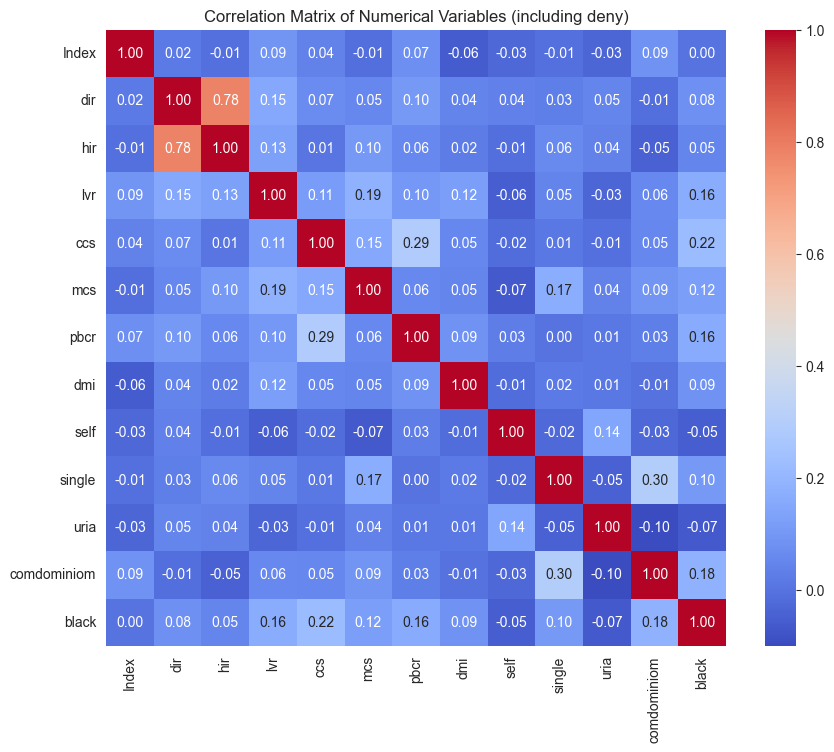

In [149]:
print("--- Correlation Matrix of Numerical Variables ---\n")
plt.figure(figsize=(10, 8))
# Ensure all columns in this list are numeric before correlation
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables (including deny)')
plt.show()

#### Insight:
1.  **Missing Values:** The `df.isnull().sum()` output should indicate if any columns have missing data. These will need to be handled (imputation or removal).
2.  **Data Types:** Confirm if all columns have appropriate data types. For instance, if 'MI' (Mortgage Insurance indicator) is an object, it might need to be converted to a numerical (binary) type. Similarly, 'RACE', 'OCC', 'SCHOOL' are currently objects and will likely need encoding.
3.  **Categorical Variable Exploration:**
    * Review the `value_counts()` for 'RACE', 'OCC', 'SCHOOL'. Look for consistent spellings, potential 'Other' categories, or categories with very few observations that might need grouping.
    * The `DENY` variable is binary (0 or 1), confirming its nature as a suitable target for binary logistic regression.
4.  **Numerical Variable Distributions:**
    * **Skewness/Outliers:** Histograms will show if numerical variables like `LOAN`, `HPI`, `ATOTAL`, `NETW` are highly skewed or contain significant outliers. Skewed distributions might benefit from mathematical transformations (e.g., log transformation) to normalize them, which can improve model performance. Box plots confirm the presence and extent of outliers.
    * **Relationship with DENY:** The box plots provide a visual cue: do the median values or interquartile ranges differ significantly between approved and denied applications for numerical features? For example, are denied applications associated with higher `DFRAC` (debt-to-income ratio) or lower `NETW`?
5.  **Categorical Variable Relationships with DENY:** Stacked bar plots indicate if certain categories within 'RACE', 'OCC', or 'SCHOOL' have noticeably higher denial rates. This is crucial for understanding potential discriminatory patterns, which is a core objective of the project.
6.  **Correlation:** The heatmap reveals linear relationships. High correlations between independent variables could indicate multicollinearity, which might affect the interpretability of regression coefficients.

## Part 3: Data Preparation & Transformation

1. Describe and justify all data transformation
2. Deletion of observations (if needed).
3. Imputation methods for missing data values.
4. Feature Engineering: Creation of new variables
5. Application of mathematical transforms (e.g., Box-Cox, logarithms) or binning.

### 1.

## Part 4: Prepped Data Review
1. Re-run EDA analysis on variables that were adjusted during the Data Preparation phase.
2. Compare and contrast the results with the pre-preparation EDA to evaluate the impact of adjustments.
3. Clearly describe how each data preparation step has improved the dataset for machine learning algorithm 

### 1.

## Part 5: Regression Modeling
1. Explain and present your regression modeling work, including your feature selection work + interpretation of the coefficients your models are generating.
2. Do they make sense intuitively? If so, why? If not, why not? Comment on the magnitude and direction of the coefficients + whether they are similar from model to model.
    

### 1.

## Part 6: Model Selection
1. Explain your model selection criteria. Identify your preferred model. Compare / contrast its performance with that of your other models.
2. Discuss why you’ve selected that specific model as your preferred model. Apply your preferred model to the testing subset and discuss your results.Did your preferred model perform as well as expected?

### 1.

## Part 7: Conclusions